In [7]:
import polars as pl
import altair as alt

In [2]:
# 四個月份
labels = ['Jun', 'Jul', 'Aug', 'Sep']
sizes = [20, 30, 40, 10]
# 圓餅圖顏色
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

In [12]:
df = pl.DataFrame({
    "labels": labels,
    "sizes": sizes,
    "colors": colors,
})
df

labels,sizes,colors
str,i64,str
"""Jun""",20,"""yellowgreen"""
"""Jul""",30,"""gold"""
"""Aug""",40,"""lightskyblue"""
"""Sep""",10,"""lightcoral"""


依下列要求以matplotlib輸出四個月份（labels = 'Jun', 'Jul', 'Aug', 'Sep'）的統計圖形，輸出圖表的參數如下：

- 完成左右兩個圖，左圖為長條圖（bar），右圖為圓餅圖（pie）
- 長條圖以labels為X軸，sizes為Y軸，各長條顏色為藍色（blue）
- 圓餅圖以labels為圖標，sizes為各項所占百分比
- 圓餅圖colors為各項顏色，長寬比為1:1，並突顯「Aug」
- 圓餅圖顯示各項百分比到小數點第1位

In [18]:
(
    alt.Chart(df)
        .mark_bar(color="blue")
        .encode(
            x="labels",
            y="sizes"
        )
) | (
    alt.Chart(df)
        .mark_arc()
        .encode(
            theta="sizes",
            color="colors",
        )
)

alt.HConcatChart(...)

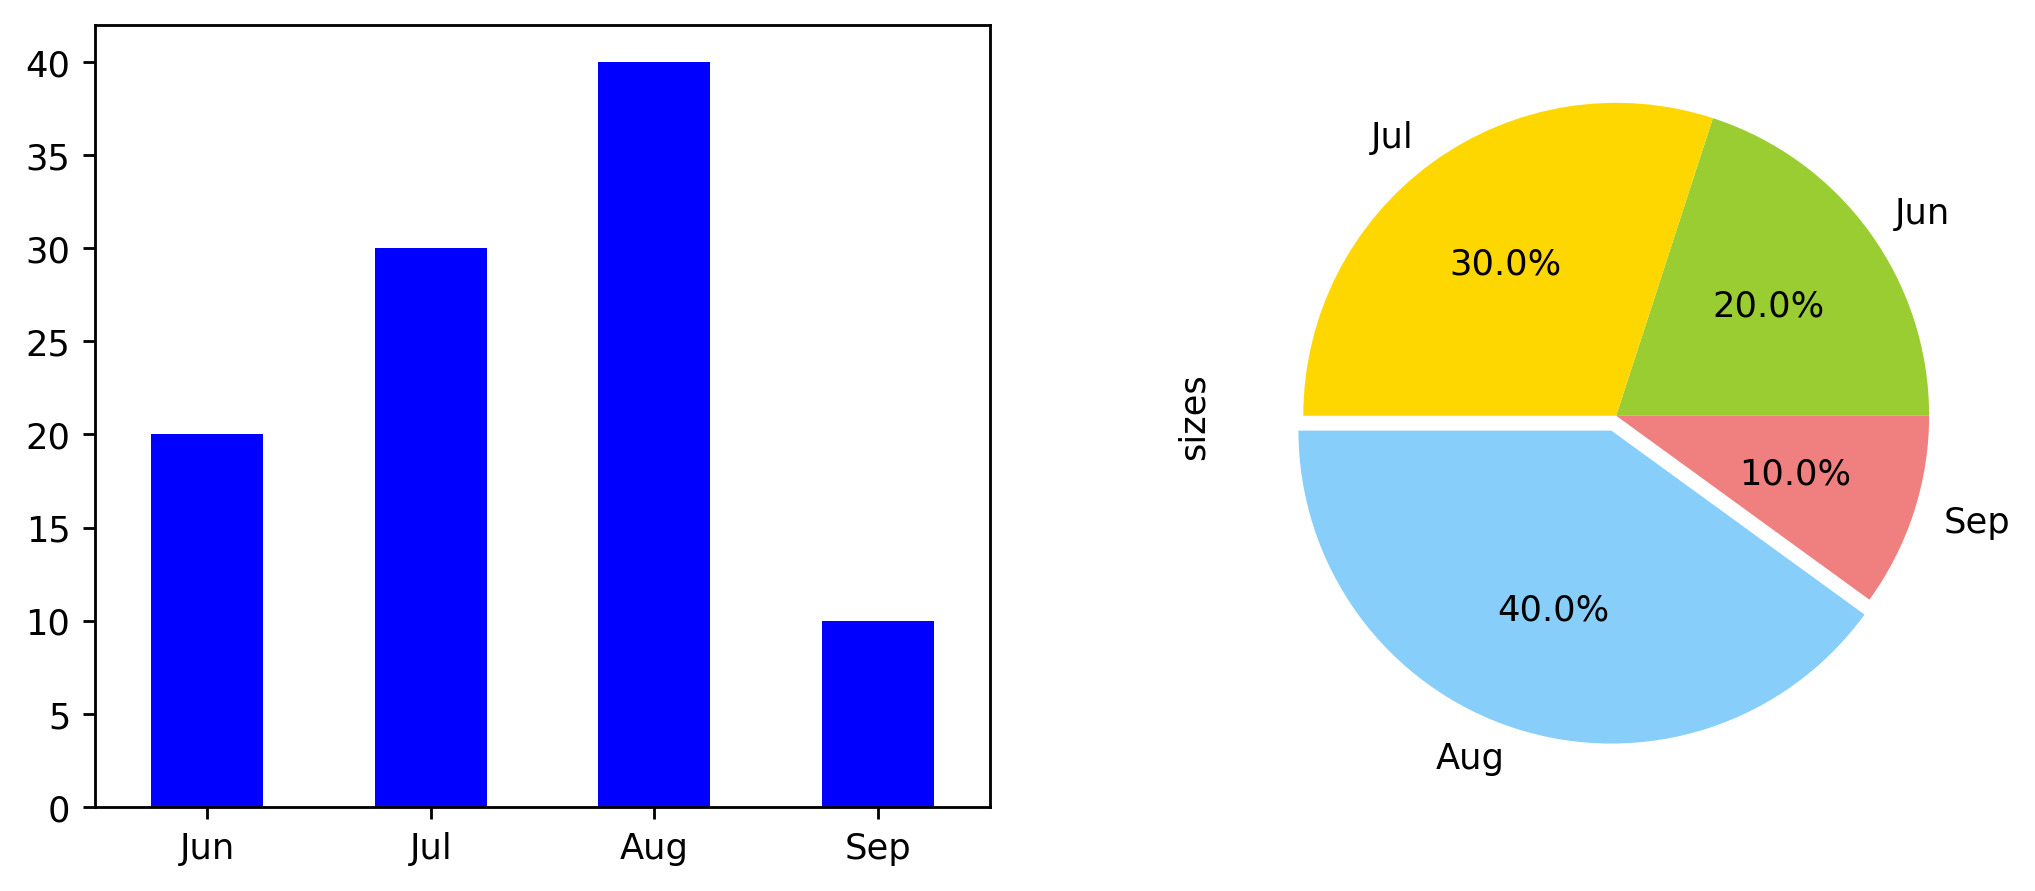

In [34]:
fig, ax = plt.subplots(ncols=2, dpi=254, figsize=(10, 4))


# 長條圖
df.plot.bar(y='sizes', color='blue', ax=ax[0], legend=None, xticks="")
ax[0].tick_params(axis='x', labelrotation=0)

# 圓餅圖
df.plot.pie(y='sizes', colors=df['colors'], autopct='%1.1f%%', ax=ax[1], explode=[0, 0, 0.05, 0], legend=None)

plt.show()